In [1]:
# Libraries

import geemap, ee # Import geemap and earth engine together

print("Libraries imported")

# Authenticate Google Earth Engine and initialize project

ee.Authenticate() # Authenticate Google Earth Engine account
ee.Initialize(project="geog-581-483717") # Initialize GEOG 581 project

print("Authenticated and initialized")

/Users/marcel/Desktop/geog581-gee-notebook/venv/lib/python3.10/site-packages/google/api_core/_python_version_support.py:275: FutureWarning: You are using a Python version (3.10.4) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


Libraries imported
Authenticated and initialized


In [2]:
# Load Landsat 8 image collections

# Surface Reflectance
L8SR = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") # Removes atmospheric effects

# Top of Atmosphere
L8TOA = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA") # Does not account for effect of atmospheric conditions


In [3]:
# Set a region of interest over Corvallis, OR

roi = ee.Geometry.Point([-123.2516667, 44.5688889])

In [4]:
# Initialize map container

Map = geemap.Map(ee_initialize=False)

In [5]:
# Filter dataset for time span of interest

L8SR_filtered = L8SR.filterDate('2015-10-10', '2015-10-15').filterBounds(roi)
L8TOA_filtered = L8TOA.filterDate('2015-10-10', '2015-10-15').filterBounds(roi)

In [6]:
# Apply scaling factor to SR dataset

def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )

L8SR_scaled = L8SR_filtered.map(apply_scale_factors)

In [7]:
# Select first image from each filtered collection

L8SR_image = L8SR_scaled.first()
L8TOA_image = L8TOA_filtered.first()

In [8]:
# Get image metadata 

# Get list of bands as an array
L8SR_band_list = L8SR_image.bandNames().getInfo()
L8TOA_band_list = L8TOA_image.bandNames().getInfo()

# Get number of bands
L8SR_num_bands = len(L8SR_band_list)
L8TOA_num_bands = len(L8TOA_band_list)

print("SR Bands:", L8SR_band_list) # Surface Reflectance band array
print("SR Number of Bands:", L8SR_num_bands) # Surface Reflectance number of bands
print("TOA Bands:", L8TOA_band_list) # Top of Atmosphere band array
print("TOA Number of Bands:", L8TOA_num_bands) # Top of Atmosphere number of bands


SR Bands: ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'SR_QA_AEROSOL', 'ST_B10', 'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT']
SR Number of Bands: 19
TOA Bands: ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'QA_PIXEL', 'QA_RADSAT', 'SAA', 'SZA', 'VAA', 'VZA']
TOA Number of Bands: 17


In [9]:
# Get rows, columns, and total pixels for each image

L8SR_info = L8SR_image.getInfo()
L8TOA_info = L8TOA_image.getInfo()

print(L8SR_info)
print(L8TOA_info)

{'type': 'Image', 'bands': [{'id': 'SR_B1', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7901], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 393885, 0, -30, 5057415]}, {'id': 'SR_B2', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7901], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 393885, 0, -30, 5057415]}, {'id': 'SR_B3', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7901], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 393885, 0, -30, 5057415]}, {'id': 'SR_B4', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7901], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 393885, 0, -30, 5057415]}, {'id': 'SR_B5', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7901], 'crs': 'EP

In [10]:
# Display true and false color 

# Visualization parameters for SR RGB
rgb_vis = {
    "min": 0,
    "max": 0.3,
    "bands": ['SR_B4', 'SR_B3', 'SR_B2']}

# Visualization parameters for SR False
false_vis = {
    "min": 0,
    "max": 0.3,
    "bands": ['SR_B5', 'SR_B4', 'SR_B3']}

# Visualization parameters for TOA RGB
toa_rgb_vis = {
    "min": 0,
    "max": 0.4,
    "bands": ['B4', 'B3', 'B2']}

# Visualization parameters for TOA False
toa_false_vis = {
    "min": 0,
    "max": 0.4,
    "bands": ['B5', 'B4', 'B3']}

# Add all four layers to map container
Map.addLayer(L8SR_image, rgb_vis, 'Corvallis RGB')
Map.addLayer(L8SR_image, false_vis, 'Corvallis False')
Map.addLayer(L8TOA_image, toa_rgb_vis, 'Corvallis TOA RGB')
Map.addLayer(L8TOA_image, toa_false_vis, 'Corvallis TOA False')

# Center around point of interest
Map.centerObject(ee.Geometry(roi), 8)

# Show map
Map

Map(center=[44.5688889, -123.2516667], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [11]:
# Get a statistical reduction of the images

# Use the reduce region function to a dictionary filled with mean of all pixel values for each band
mean_dictionary_SR = L8SR_image.reduceRegion(reducer=ee.Reducer.mean(), scale=30, maxPixels=1e9)
mean_dictionary_TOA = L8TOA_image.reduceRegion(reducer=ee.Reducer.mean(), scale=30, maxPixels=1e9)

print(mean_dictionary_SR.getInfo())
print(mean_dictionary_TOA.getInfo())

{'QA_PIXEL': 21877.403388262373, 'QA_RADSAT': 0.0001275457097965396, 'SR_B1': 0.011170529570103734, 'SR_B2': 0.01679632509854225, 'SR_B3': 0.03433548429530112, 'SR_B4': 0.03245246272256908, 'SR_B5': 0.2080610830929151, 'SR_B6': 0.11118741027800096, 'SR_B7': 0.06128205222864313, 'SR_QA_AEROSOL': 95.90322442166497, 'ST_ATRAN': 7715.283047338548, 'ST_B10': 293.7617752209188, 'ST_CDIST': 781.1459727962192, 'ST_DRAD': 803.8656454086474, 'ST_EMIS': 9810.568480662956, 'ST_EMSD': 92.05128440578929, 'ST_QA': 248.59721907791894, 'ST_TRAD': 8290.729351129188, 'ST_URAD': 1666.2420424347417}
{'B1': 0.1141924191372471, 'B10': 290.4255759261906, 'B11': 289.6732266748144, 'B2': 0.09034954988526225, 'B3': 0.06801744486376328, 'B4': 0.05178396222891133, 'B5': 0.2098948093141057, 'B6': 0.10630257655769881, 'B7': 0.055943533624449905, 'B8': 0.060248719099489804, 'B9': 0.0009087037719008288, 'QA_PIXEL': 21877.403384781668, 'QA_RADSAT': 0.00012458235638582263, 'SAA': 16119.956131947552, 'SZA': 5425.63643033

In [12]:
# Get the mean value for all pixels in the near infrared band for each image (BAND 5)

print("L8SR Band 5 Mean:", mean_dictionary_SR.getInfo().get('SR_B5'))
print("L8TOA Band 5 Mean:", mean_dictionary_TOA.getInfo().get('B5'))


L8SR Band 5 Mean: 0.2080610830929151
L8TOA Band 5 Mean: 0.2098948093141057


In [13]:
# Get the range of all pixel values in the near infrared band for each image (BAND 5)

region = roi.buffer(5000)  # meters

range_SR = L8SR_image.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=region,
    scale=30,
    maxPixels=1e9,
    bestEffort=True,
)

range_TOA = L8TOA_image.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=region,
    scale=30,
    maxPixels=1e9,
    bestEffort=True,
)

sr = range_SR.getInfo()
toa = range_TOA.getInfo()

sr_min = sr["SR_B5_min"]
sr_max = sr["SR_B5_max"]
sr_range = sr["SR_B5_max"] -  sr["SR_B5_min"]
toa_min = toa["B5_min"]
toa_max = toa["B5_max"]
toa_range = toa["B5_max"] -  toa["B5_min"]

print(f"L8SR Band 5: Min = {sr_min:.5g}, Max = {sr_max:.5g}, Range = {sr_range:.5g}")
print(f"L8TOA Band 5: Min = {toa_min:.5g}, Max = {toa_max:.5g}, Range = {toa_range:.5g}")

L8SR Band 5: Min = -0.013165, Max = 1.5859, Range = 1.5991
L8TOA Band 5: Min = -0.0044511, Max = 1.9424, Range = 1.9469


In [14]:
# Isolate the NIR band for each image

# Select the Near Infrared band for each image
L8SR_NIR = L8SR_image.select(4)
L8TOA_NIR = L8TOA_image.select(4)

# Set grayscale palettes for both based on previously found ranges
sr_gray_vis = {
    "min": sr_min,
    "max": sr_max,
    "palette": ["000000", "FFFFFF"],
}

toa_gray_vis = {
    "min": toa_min,
    "max": toa_max,
    "palette": ["000000", "FFFFFF"],
}

# Initialize map container
nir_map = geemap.Map(ee_initialize=False)

# Add all four layers to map container
nir_map.addLayer(L8SR_NIR, sr_gray_vis, 'SR NIR')
nir_map.addLayer(L8TOA_NIR, toa_gray_vis, 'TOA NIR')

# Center around point of interest
nir_map.centerObject(ee.Geometry(roi), 12)

# Show map
nir_map


Map(center=[44.5688889, -123.2516667], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [15]:
# Get geometry drawn on map of Oregon State University campus

#feat = nir_map.draw_features[-1]
#geometry = feat.geometry()
#print(geometry.getInfo())

hardcoded_geometry = {'coordinates': [[-123.2896, 44.556878], [-123.289746, 44.567887], [-123.280012, 44.567978], [-123.279983, 44.569073], [-123.264052, 44.565212], [-123.266664, 44.560189], [-123.267731, 44.56048], [-123.275811, 44.559618], [-123.276983, 44.559333], [-123.278133, 44.558733], [-123.280385, 44.557569], [-123.281612, 44.557172], [-123.282858, 44.556918], [-123.284478, 44.556836], [-123.289491, 44.556865]]}

In [16]:
# Build histogram of NIR pixel values within geometric bounds

coords = hardcoded_geometry["coordinates"]
geometry = ee.Geometry.Polygon([coords])

hist_SR = L8SR_NIR.reduceRegion(
    reducer=ee.Reducer.histogram(maxBuckets=256),
    geometry=geometry,
    scale=30,
    bestEffort=True,
    maxPixels=1e9,
)

hist_TOA = L8TOA_NIR.reduceRegion(
    reducer=ee.Reducer.histogram(maxBuckets=256),
    geometry=geometry,
    scale=30,
    bestEffort=True,
    maxPixels=1e9,
)

print(hist_SR.getInfo())
print(hist_TOA.getInfo())

{'SR_B5': {'bucketMeans': [0.04565749999999999, 0.048242499999999994, 0.052734375, 0.056640625, 0.060546875, 0.064453125, 0.06818000000000002, 0.07187874999999999, 0.07528874999999999, 0.0810225, 0.08442333333333334, 0.08764999999999999, 0.09184456507731958, 0.09609642857142857, 0.0999879693662898, 0.1035041672834937, 0.10794847494553376, 0.11137398796164048, 0.11489165803929853, 0.11928323892245718, 0.122747326546003, 0.127183743796256, 0.13060771562855078, 0.1349278572481935, 0.1388183586700268, 0.1424909557181841, 0.14642431184323576, 0.15041063144163874, 0.15423598818357542, 0.15824599893694766, 0.1620127004716981, 0.16597117975330916, 0.16988789307057486, 0.17396238996879473, 0.17760713539758158, 0.18205515569167943, 0.18511063205181777, 0.18936907489483173, 0.193358250513046, 0.1971065241379311, 0.2012068870722129, 0.20482286373211311, 0.20913127329324074, 0.21302269913106445, 0.2166872179541149, 0.22087234036039177, 0.22465354885851962, 0.2287479244178483, 0.2322974872923382, 0.

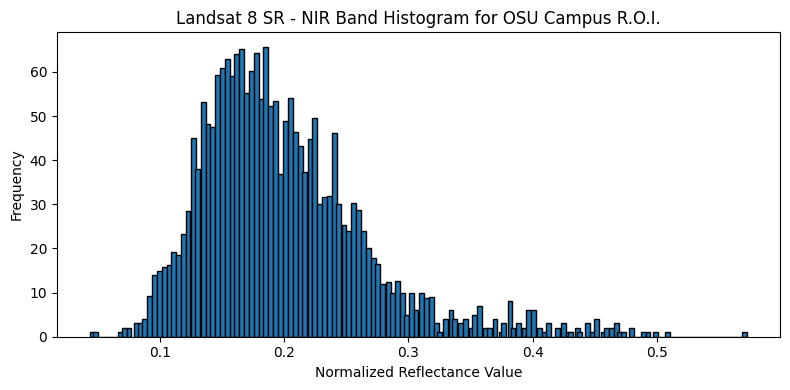

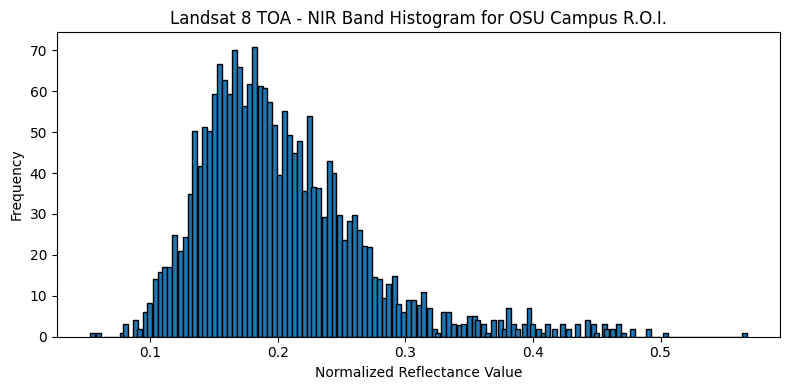

In [17]:
# Create histogram plots

import matplotlib.pyplot as plt

# ----- Surface Reflectance -----
hist_sr_info = hist_SR.getInfo()
sr_nir_hist = hist_sr_info["SR_B5"]

x = sr_nir_hist["bucketMeans"] 
y = sr_nir_hist["histogram"]  
w = sr_nir_hist.get("bucketWidth", None)
if w is None and len(x) > 1:
    w = x[1] - x[0]
elif w is None:
    w = 1

plt.figure(figsize=(8, 4))
plt.bar(x, y, width=w, align="center", edgecolor="black")
plt.title("Landsat 8 SR - NIR Band Histogram for OSU Campus R.O.I.")
plt.xlabel("Normalized Reflectance Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ----- Top of Atmosphere -----
hist_toa_info = hist_TOA.getInfo()
toa_nir_hist = hist_toa_info["B5"]

x = toa_nir_hist["bucketMeans"] 
y = toa_nir_hist["histogram"]  
w = toa_nir_hist.get("bucketWidth", None)
if w is None and len(x) > 1:
    w = x[1] - x[0]
elif w is None:
    w = 1

plt.figure(figsize=(8, 4))
plt.bar(x, y, width=w, align="center", edgecolor="black")
plt.title("Landsat 8 TOA - NIR Band Histogram for OSU Campus R.O.I.")
plt.xlabel("Normalized Reflectance Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [18]:
# Get minMax of image subset

nir_minMax_SR = L8SR_NIR.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=geometry,
    scale=30,
    bestEffort=True,
    maxPixels=1e9,
)

nir_minMax_TOA = L8TOA_NIR.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=geometry,
    scale=30,
    bestEffort=True,
    maxPixels=1e9,
)

print(nir_minMax_SR.getInfo())
print(nir_minMax_TOA.getInfo())


{'SR_B5_max': 0.5704125, 'SR_B5_min': 0.04565749999999999}
{'B5_max': 0.5659776926040649, 'B5_min': 0.054337963461875916}
